# Проект - "Анализ бизнес показателей развлекательного приложения Procrastinate Pro+". 

## 1 Описание проекта. 

Опишем общую информацию о заказчике, план проекта и цели.

**Общая информация о заказчике:** Маркетинговый отдел развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, компания последние несколько месяцев терпит убытки.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

В нашем распоряжении три датасета:
1. Файл `visits_info_short.csv` — хранит лог сервера с информацией о посещениях сайта, 
2. `orders_info_short.csv` — информацию о заказах, 
3. `costs_info_short.csv` — информацию о расходах на рекламу.

**Цель проекта** — разобраться в причинах возникновения убытков и помочь компании выйти в плюс.

**Задачи:** 

- Узнать откуда приходят пользователи и какими устройствами они пользуются,
- Узнать сколько стоит привлечение пользователей из различных рекламных каналов;
- Узнать сколько денег приносит каждый клиент,
- Узнать когда расходы на привлечение клиента окупаются,
- Узнать какие факторы мешают привлечению клиентов.

**План проекта:**

1. Описание проекта.
2. Загрузка данных и изучение общей информации.
3. Предобработка данных.
4. Функции для расчёта и анализа LTV, ROI, удержания и конверсии.
5. Исследовательский анализ данных.
6. Маркетинг.
7. Оценим окупаемость рекламы.
8. Общие выводы.

## 2 Загрузка данных и изучение общей информации.

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [6]:
# импортируем все библиотеки которые применим в данном преокте

import pandas as pd
import numpy as np
import time 
from datetime import date, datetime, timedelta as td
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
visit = pd.read_csv('/datasets/visits_info_short.csv') # сохраним датафрейм с данными о визитах в переменную visit
order = pd.read_csv('/datasets/orders_info_short.csv') # сохраним датафрейм с данными о заказах в переменную order
cost = pd.read_csv('/datasets/costs_info_short.csv') # сохраним датафрейм с данными о рекламных расходах в переменную cost

### 2.1 Изучим датафрейм с данными о визитах.

In [3]:
visit.head() # выведем первые 5 строк таблицы 

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Таблица содержит данные с информацией о посещениях сайта, всего 6 столбцов: 
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Необходимо привести названия столбцов к нижнему змеиному регистру для удобства чтения. 

In [4]:
visit.info() # выведем основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Столбец `User Id` имеет числовой тип, остальные - тип **object**. Столбцы с датой нужно перевести в тип - **datetime**. 

In [5]:
round((visit.isna().mean()*100),2) # найдем процент пропущегный значений в каждом столбце 

User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64

В датафрейме `visit` пропусков нет 

In [7]:
visit['region'].unique() # выведем уникальные значения для столбца - страна пользователя

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

В таблице представлены данные пользователей из 4 стран (США, Соединённое Королевство, Франция и Германия).

In [9]:
print(visit.duplicated().sum()) # выведем колличество дубликатов 

0


В датафрейме `visit` дубликтов нет.

В датафрейме `visit` пропусков дубликатов нет. Необходимо привести названия столбцов к нижнему змеиному регистру и заменить тип.

### 2.2 Изучим датафрейм с данными о заказах.

In [10]:
order.head() # выведем первые 5 строк таблицы 

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Таблица содержит данные с информацией о заказах, всего 3 столбца:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Названия столбцов прописаны не в едином стиле - присутствует верхний и нижний регистр букв, имеются пробелы между словами. Нужно преоброзовать названия. 

In [11]:
order.info() # выведем основную информацию о датафрейме с помощью метода info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Столбец с датой нужно перевести в тип - **datetime**.

In [12]:
round((order.isna().mean()*100),2) # найдем процент пропущегный значений в каждом столбце

User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64

В датафрейме `order` пропусков нет

In [15]:
print(order.duplicated().sum()) # выведем колличество дубликатов 

0


В датафрейме `order` дубликтов нет.

В датафрейме `order` пропусков дубликатов нет. Необходимо привести названия столбцов к нижнему змеиному регистру и заменить тип.

### 2.3 Изучим датафрейм с данными о расходах на реклам.

In [16]:
cost.head() # выведем первые 5 строк таблицы 

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Таблица содержит данные с информацией о расходах на рекламу, всего 3 столбца: 
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

Названия столбцов прописаны не в едином стиле - присутствует верхний и нижний регистр букв. Нужно преоброзовать названия. 

In [17]:
cost.info() # выведем основную информацию о датафрейме с помощью метода info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Столбец с датой нужно перевести в тип - **datetime**.

In [18]:
round((cost.isna().mean()*100),2) # найдем процент пропущегный значений в каждом столбце

dt         0.0
Channel    0.0
costs      0.0
dtype: float64

В датафрейме `cost` пропусков нет

In [21]:
print(cost.duplicated().sum()) # выведем колличество дубликатов 

0


В датафрейме `cost` дубликатов нет.

В датафрейме `cost` пропусков дубликатов нет. Необходимо привести названия столбцов к нижнему змеиному регистру и заменить тип.

**Вывод:**  В нашем распоряжение 3 датасета: 
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы. 

Во всех таблицах пропусков дубликатов нет, но необходимо привести названия столбцов к нижнему змеиному регистру и заменить тип.

## 3 Предобработка данных.

Приведем названия столбцов к единому стилю.

In [6]:
visit.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end'] 

In [13]:
order.columns = ['user_id', 'event_dt', 'revenue'] 

In [19]:
cost.columns = ['dt', 'channel', 'costs'] 

Преобразуем тип данных для столбцов с датой и временем.

In [8]:
visit['session_start'] = pd.to_datetime(visit['session_start'])#, format="%d-%m-%Y %H:%M")
visit['session_end'] = pd.to_datetime(visit['session_end'])#, format="%d.%m.%Y %H:%M")

In [14]:
order['event_dt'] = pd.to_datetime(order['event_dt']) 

In [20]:
cost['dt'] = pd.to_datetime(cost['dt'])

**Вывод:** Привели названия столбцов к единому стилю - к нижнему змеиному регистру. Преобразовали тип данных для столбцов с датой и временем. Предобработка данных завершена.

## 4 Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [22]:
observation_date = datetime(2019, 11, 1).date()  # зададим момент анализа 
horizon_days = 14  # зададим горизонт анализа 

In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [24]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для расчёта LTV 

def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [26]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [48]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df  

In [27]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [49]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [51]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [53]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

**Вывод:** Функции LTV, ROI, удержания(retention), конверсии(conversion) заданы

## 5 Исследовательский анализ данных.

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построем таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируем выводы.

### 5.1 Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

In [28]:
profiles = get_profiles(visit, order, cost)
#profiles

In [29]:
profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

In [30]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 

In [31]:
min_analysis_date # выведем минимальная дату привлечения пользователей

Timestamp('2019-05-01 00:00:00')

In [32]:
observation_date # выведем максимальную дату привлечения пользователей

Timestamp('2019-10-27 00:00:00')

**Вывод:**  Даты совпадают с заданием:

Минимальная дата привлечения пользователей - `1 мая 2019 года`.

Максимальная дата привлечения пользователей - `27 октября 2019 года`.

### 5.2  Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [33]:
visit.head(5)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [34]:
region_payer_share = pd.DataFrame()
region_payer_share['users_cnt'] = profiles.groupby('region')['user_id'].count()
region_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_share['share'] = 100*(region_payer_share['payer_users_cnt'] / region_payer_share['users_cnt'])
region_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


**Вывод:** Больше всего платящих пользователей приходится на `United States` - 6,9% 

### 5.3 Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построем таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [35]:
device_payer_share = pd.DataFrame()
device_payer_share['users_cnt'] = profiles.groupby('device')['user_id'].count()
device_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_share['share'] = 100*(device_payer_share['payer_users_cnt'] / device_payer_share['users_cnt'])
device_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


**Вывод:** Большинство платящих пользователей предпочитают `IPhone` (6.2%) и `Mac` (6.4%).

### 5.4 Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построем таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [36]:
channel_payer_share = pd.DataFrame()
channel_payer_share['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_payer_share['payer_users_cnt'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_payer_share['share'] = 100*(channel_payer_share['payer_users_cnt'] / channel_payer_share['users_cnt']) 
channel_payer_share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,users_cnt,payer_users_cnt,share
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


**Вывод:** Больше всего платящих пользователей пришло из каналов: `FaceBoom` (12,2%), `AdNonSense` (11,3%), `lambdaMediaAds` (10,5%), `TipTop` (9,6%).

**Выводы по разделу:** 

1. Минимальная дата привлечения пользователей - `1 мая 2019 года`.

2. Максимальная дата привлечения пользователей - `27 октября 2019 года`.

3. Больше всего платящих пользователей приходится на `United States` - 6,9%

4. Большинство платящих пользователей предпочитают `IPhone` (6.2%) и `Mac` (6.4%).

5. Больше всего платящих пользователей пришло из каналов: `FaceBoom` (12,2%), `AdNonSense` (11,3%), `lambdaMediaAds` (10,5%), `TipTop` (9,6%).

## 6 Маркетинг.

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построем визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

Напишим промежуточные выводы.

### 6.1 Посчитаем общую сумму расходов на маркетинг.

In [37]:
cost.head() # выведем таблицу costs 

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [38]:
# найдем и выведем на экран сумму значений столбца costs 
total_cost = cost['costs'].sum().round() 
total_cost

105497.0

**Вывод:** Общая сумма расходов на маркетинг: 105 497.

### 6.2 Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [39]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = round(cost.groupby('channel')['costs'].sum(), 2)
channel_costs_report['percent'] = 100*(channel_costs_report['costs'] / total_cost)
channel_costs_report.sort_values(by='costs', ascending=False).style.format({'percent': '{:.0f}%'})

,costs,percent
channel,,
TipTop,54751.300000,52%
FaceBoom,32445.600000,31%
WahooNetBanner,5151.000000,5%
AdNonSense,3911.250000,4%
OppleCreativeMedia,2151.250000,2%
RocketSuperAds,1833.000000,2%
LeapBob,1797.600000,2%
lambdaMediaAds,1557.600000,1%
MediaTornado,954.480000,1%


**Вывод:** Больше всего было потрачено на маркетинг в каналах `TipTop` и `FaceBoom`. На них приходится больше 80% всех затрат.

### 6.3 Построем визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [41]:
cost['month'] = cost['dt'].dt.month # добавим столбец с номером месяца 

In [42]:
cost['week'] = cost['dt'].dt.week  # добавим столбец с номером недели

In [43]:
cost.head()  # выведем таблицу

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


In [44]:
filtered_month = cost.pivot_table(
        index='month', columns='channel', values='costs', aggfunc='sum'
    ) # посмотрим расходы по месяцам по каждому источнику

In [45]:
filtered_week = cost.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
    ) # посмотрим расходы по неделям по каждому источнику

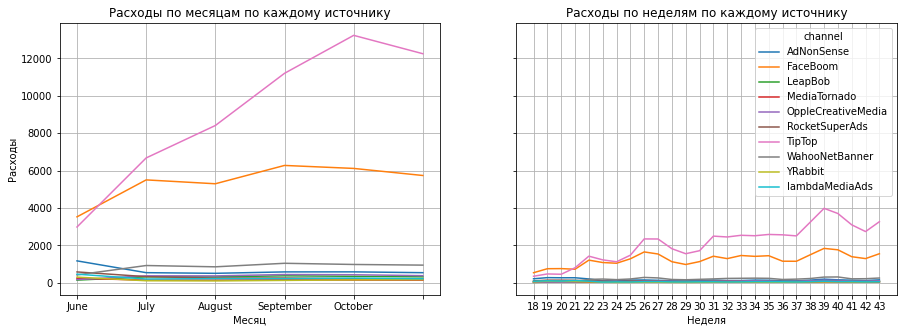

In [46]:
# зададим размер сетки для графиков
plt.figure(figsize=(15, 5))
 
# первый график — расходы по месяцам по каждому источнику
ax1 = plt.subplot(1, 2, 1)
filtered_month.plot(
    ax = ax1,
    grid=True,
    legend=False,
    xlabel='Месяц',
    ylabel='Расходы',
    title='Расходы по месяцам по каждому источнику'
)
ax1.set_xticklabels(['May', 'June', 'July', 'August', 'September', 'October'])
 
# второй график — расходы по неделям по каждому источнику
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
filtered_week.plot(
    ax=ax2,
    grid=True,
    legend=True,
    xlabel='Неделя',
    ylabel='Расходы',
    title='Расходы по неделям по каждому источнику',
    xticks=range(18, 44)
);

**Вывод:** Видим динамику расходов. `TipTop` и `FaceBoom` заметно выделяются.

### 6.4 Использую профили пользоватлей узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [47]:
#Посмотрим на CAC для каждого источника трафика.

cac_by_channel = pd.DataFrame()
# уберём органических пользователей:
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


**Вывод:** 
- Самыми дорогими трафиками вышли `TipTop` (2.8), `FaceBoom` (1.11) и `AdNonSense` (1.01).
- Самыми дешевыми - `YRabbit`	(0.22), `MediaTornado` (0.22) и `LeapBob` (0.21). 

**Выводы по разделу:**

1. Общая сумма расходов на маркетинг: 105 497
2. Больше всего было потрачено на маркетинг в каналах `TipTop` и `FaceBoom`. На них приходится больше 80% всех затрат.
3. Можно сделать вывод, что затраты на маркетинг со временем заметно возрастали только на двух каналах `TipTop` и `FaceBoom`.
4. - Самыми дорогими трафиками вышли `TipTop` (2.8), `FaceBoom` (1.11) и `AdNonSense` (1.01).
   - Самыми дешевыми - `YRabbit` (0.22), `MediaTornado` (0.22) и `LeapBob` (0.21).

## 7 Оценим окупаемость рекламы.

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Посчитаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Построем и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишем вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### 7.1 Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI. 

Предположим, что что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

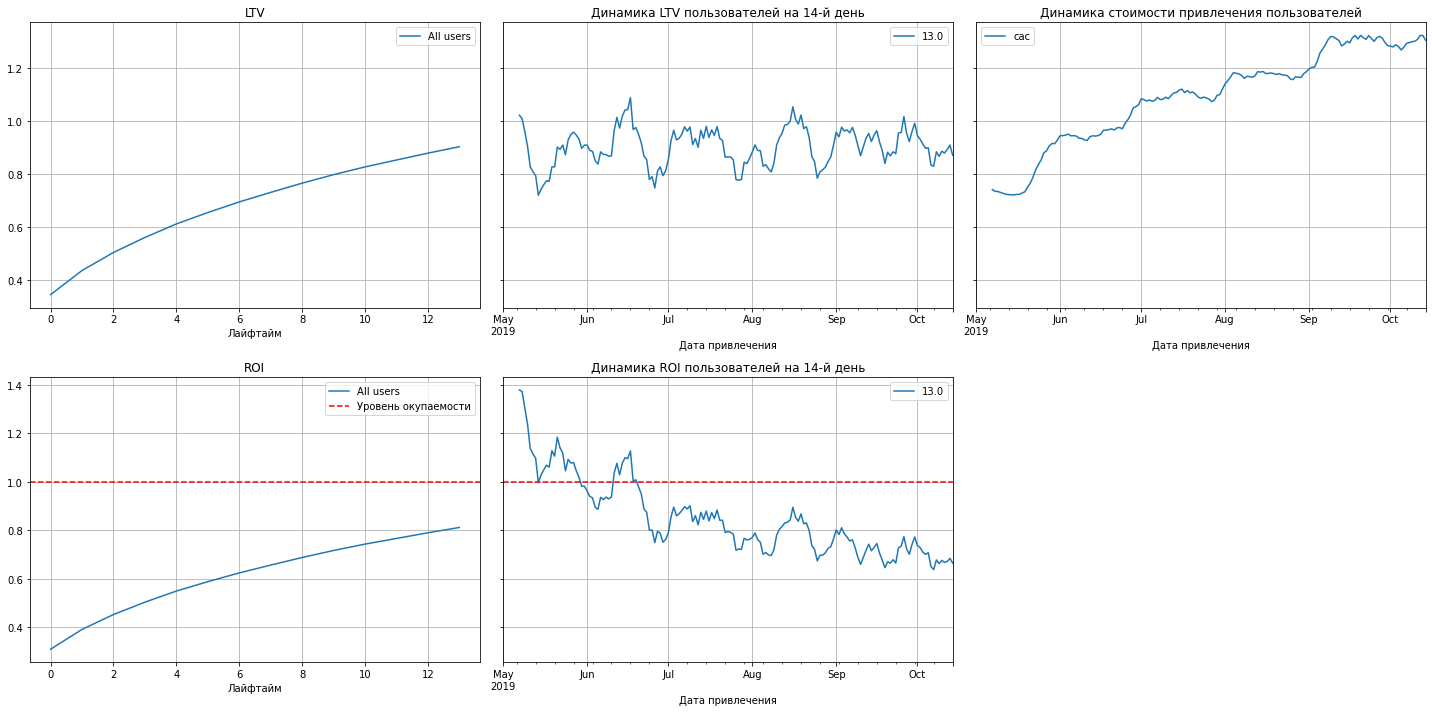

In [50]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод по графикам общей окупаемости рекламы:**
- LTV держится на примерно одном уровне на протяжении всего эксперимента
- CAC на протяжении всего эксперимента растёт
- ROI не доходит до уровня окупаемости.
- Пользователи перестают окупаться уже в июне.

### 7.2 Проверим конверсию пользователей и динамику её изменения. 
То же самое сделаем с удержанием пользователей и построем графики конверсии и удержания.

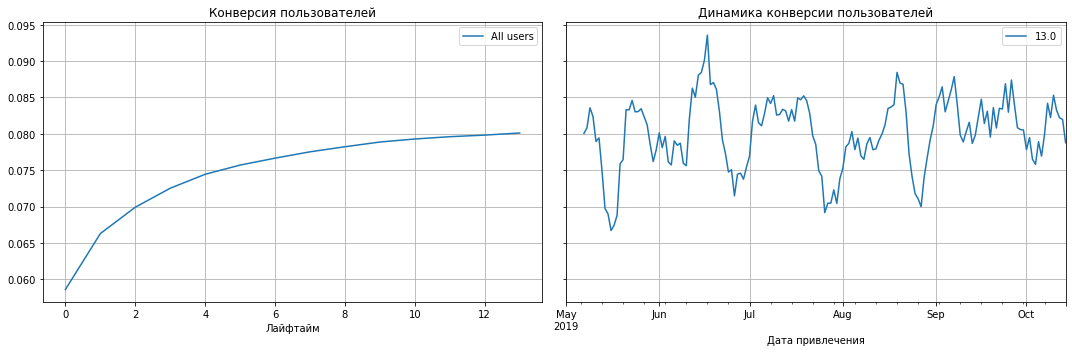

In [52]:
# считаем конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days,
)

# строим графики 
plot_conversion(conversion_grouped, conversion_history, horizon_days)


**Вывод:** Конверсия пользоватлей в период лайфтайма растет, динамика не стабильна, но больших просадок нет 

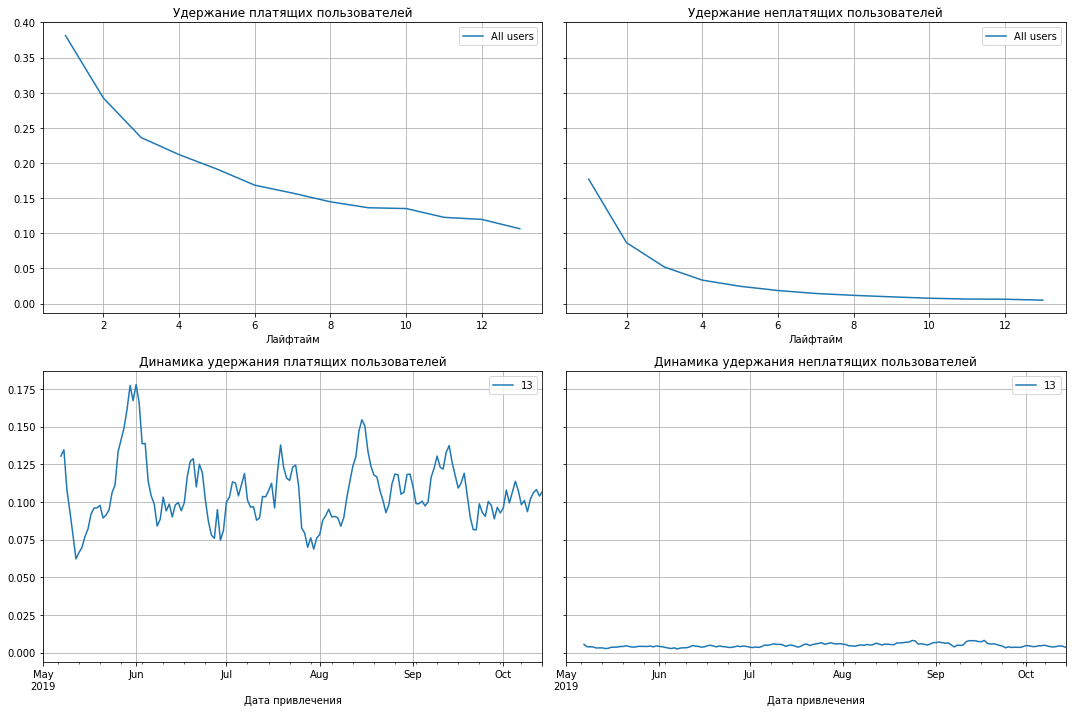

In [54]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days,
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
Динамика удержания платящих пользователей не стабильна, в отличии от неплатящих, но выше, наблюдаем явные проблемы.

### 7.3 Проанализируем окупаемость рекламы с разбивкой по устройствам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

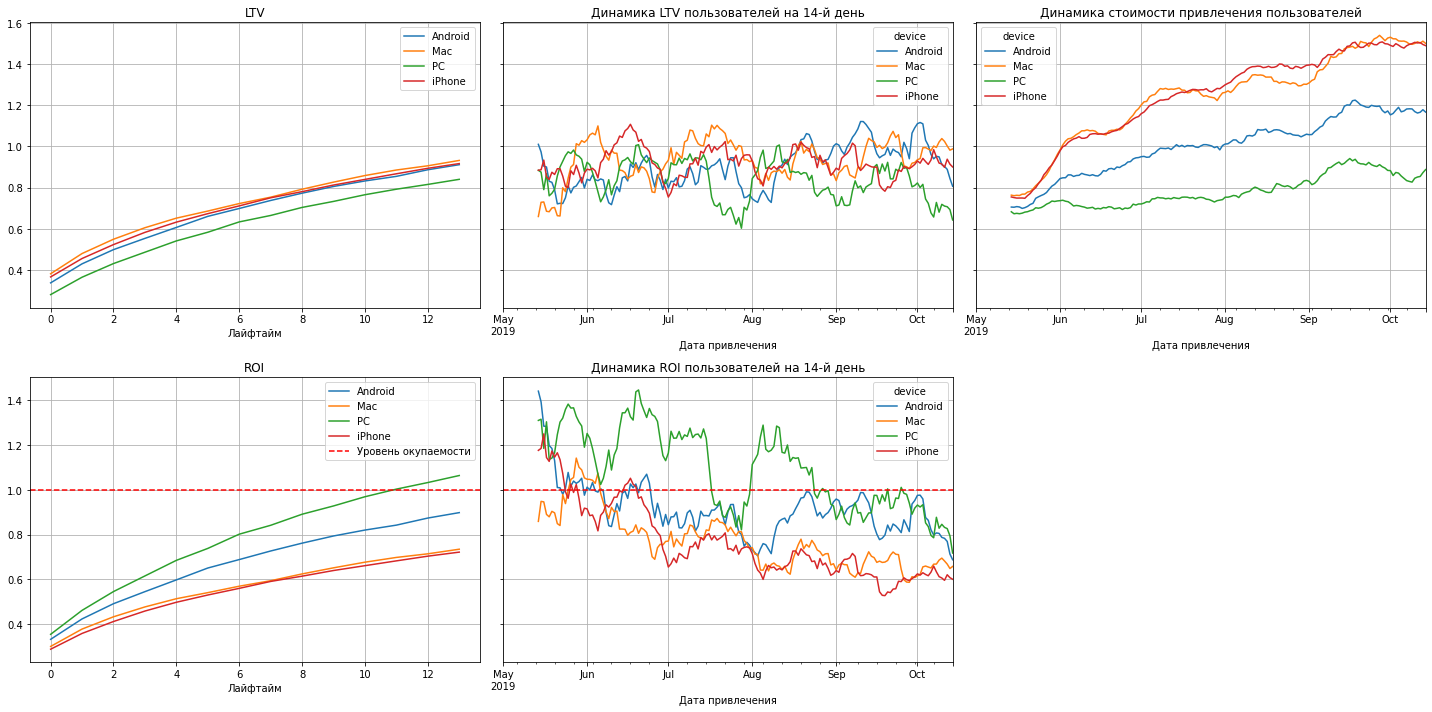

In [55]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Анализ графика окупаемости рекламы с разбивкой по устройствам:** 
1. LTV пользователей с устройствами PC самый низкий, но затраты на рекламу окупаются раньше чем с другими устройствами.
2. Динамика стоимости привлечения пользователей растёт у всех, но более интенсивно для устройств Mac и iPhone.
3. Начниная с конца августа пользователи всех устройств перестали окупаются к концу 2 недели, кроме РС, но в динамике видим, что и он с сентября перестает окупаться. 

### 7.4 Проанализируем окупаемость рекламы с разбивкой по странам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

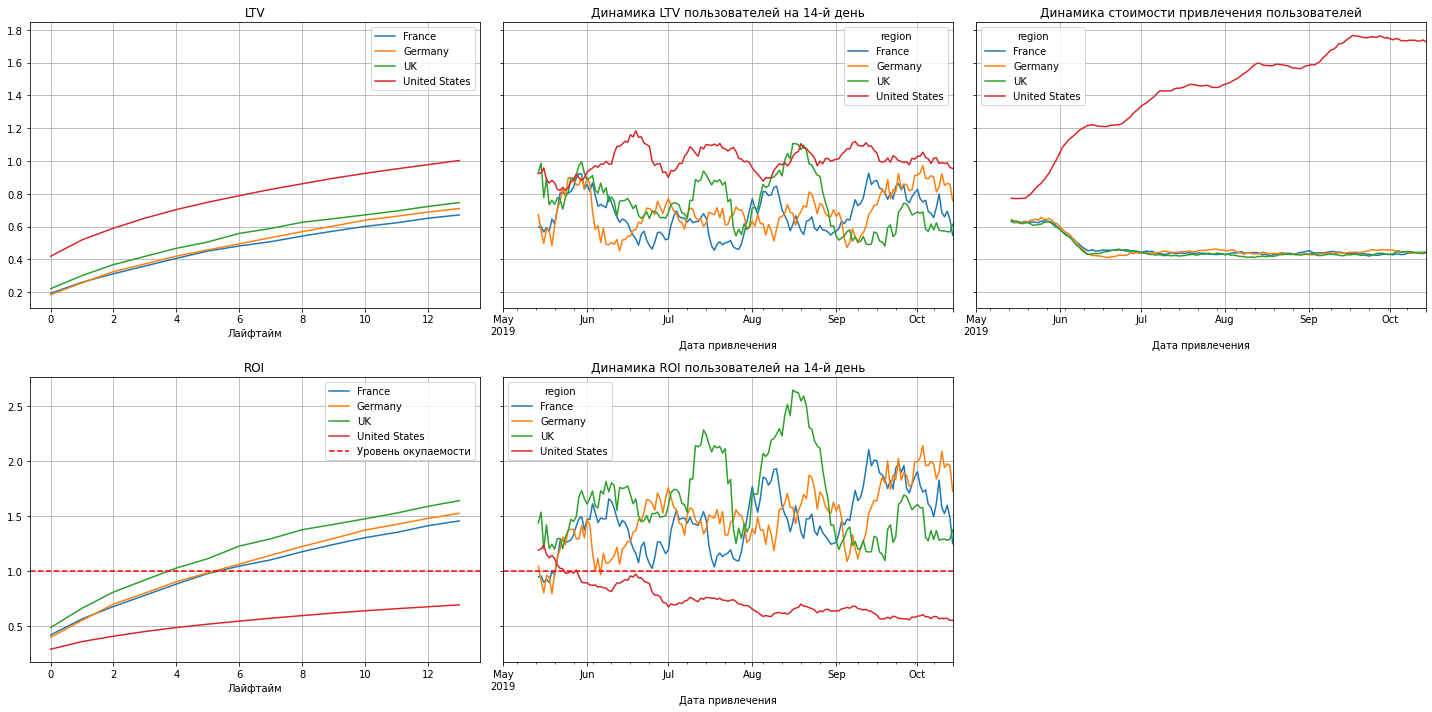

In [56]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Анализ графика окупаемости рекламы с разбивкой по странам:**
LTV пользователей из США самый высокий, но затраты на рекламу не окупаются.

### 7.5 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

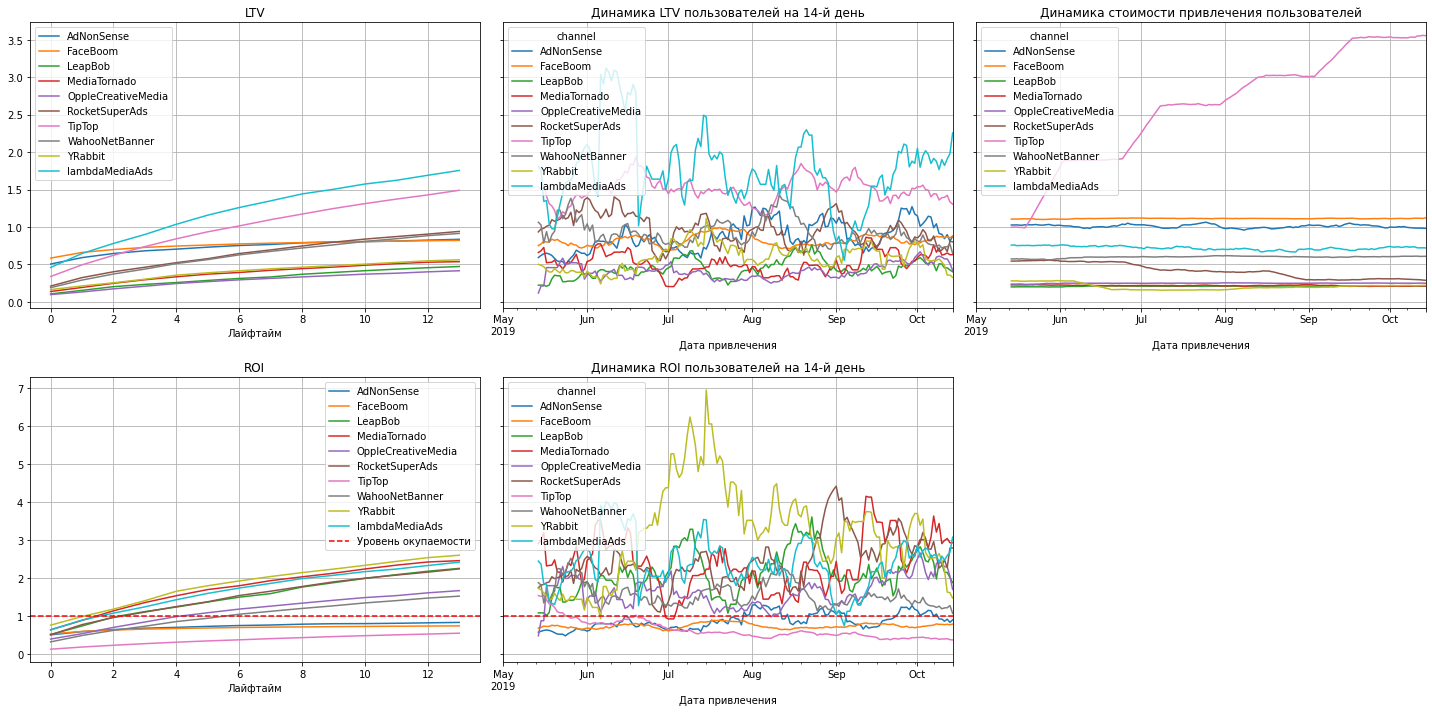

In [57]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Анализ графика окупаемости рекламы с разбивкой по каналам:**
- LTV на каналах существенно различается.
- Динамика стоимости привлечения пользователей растёт только у `TipTop`.
- Не окупаются к концу 2 недели пользователи из каналов: `TipTop`, `FaceBoom`, `AdNonSense`.

### 7.7 Построем графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

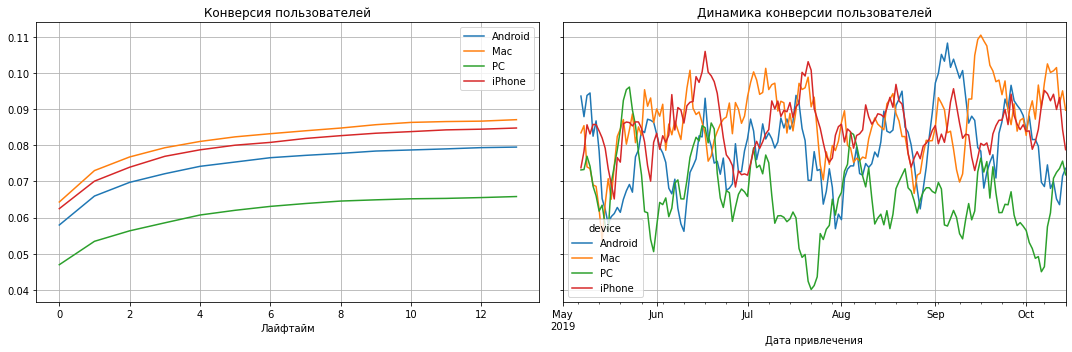

In [58]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Анализ графика конверсии с разбивкой по устройствам:** Большие просадки по конверсии у пользователей `PC` и `Android`.

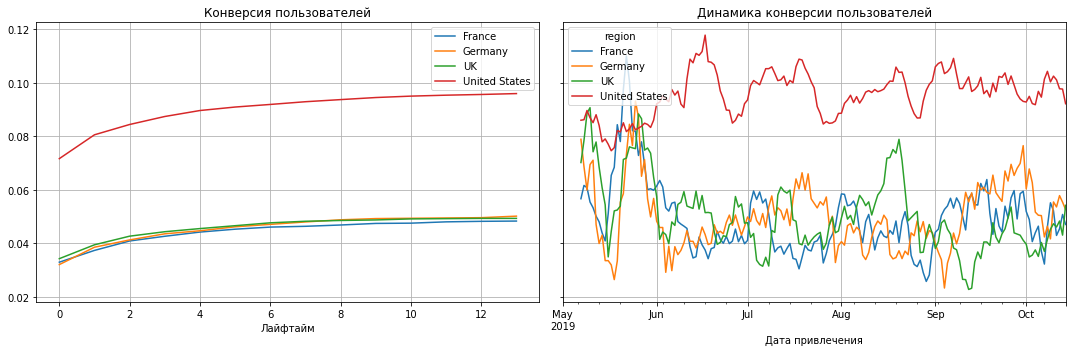

In [59]:
dimensions = ['region']
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Анализ графика конверсии с разбивкой по странам:** Конверсия пользователей из США в 2 раза выше чем у пользователей из других стран.

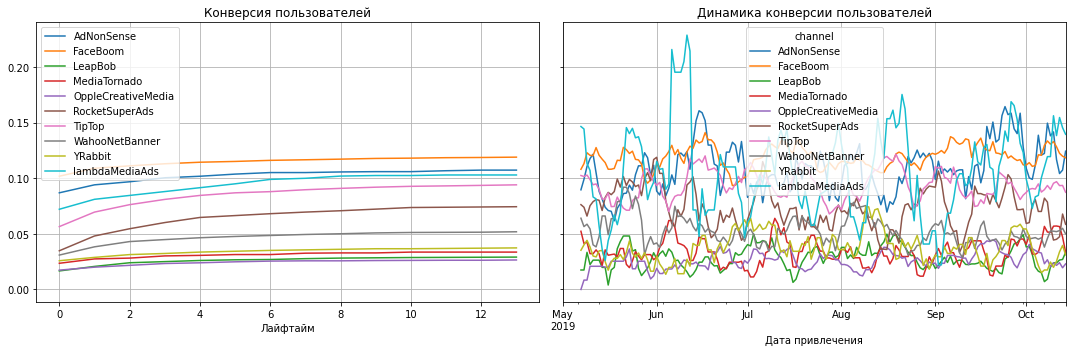

In [60]:
dimensions = ['channel']
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Анализ графика конверсии с разбивкой по каналам:** В конверсии пользователей из разных каналов наблюдается сезонность.

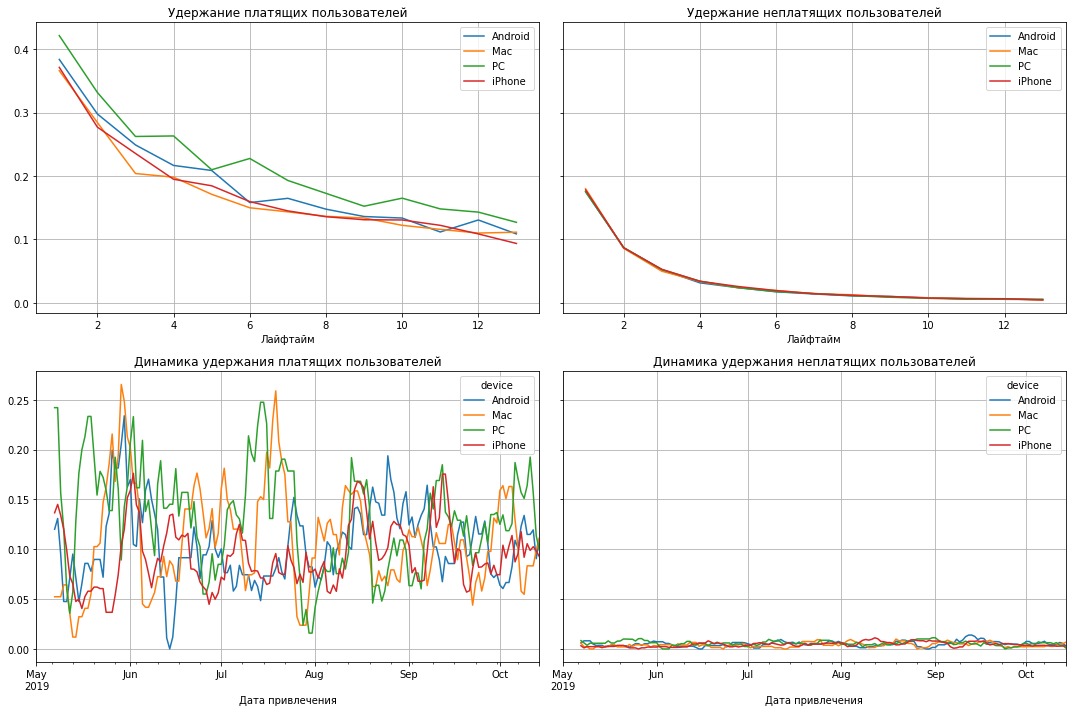

In [61]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Анализ графика удержания с разбивкой по устройствам:** Динамика удержания неплатящих пользователей примерно одинаковая.

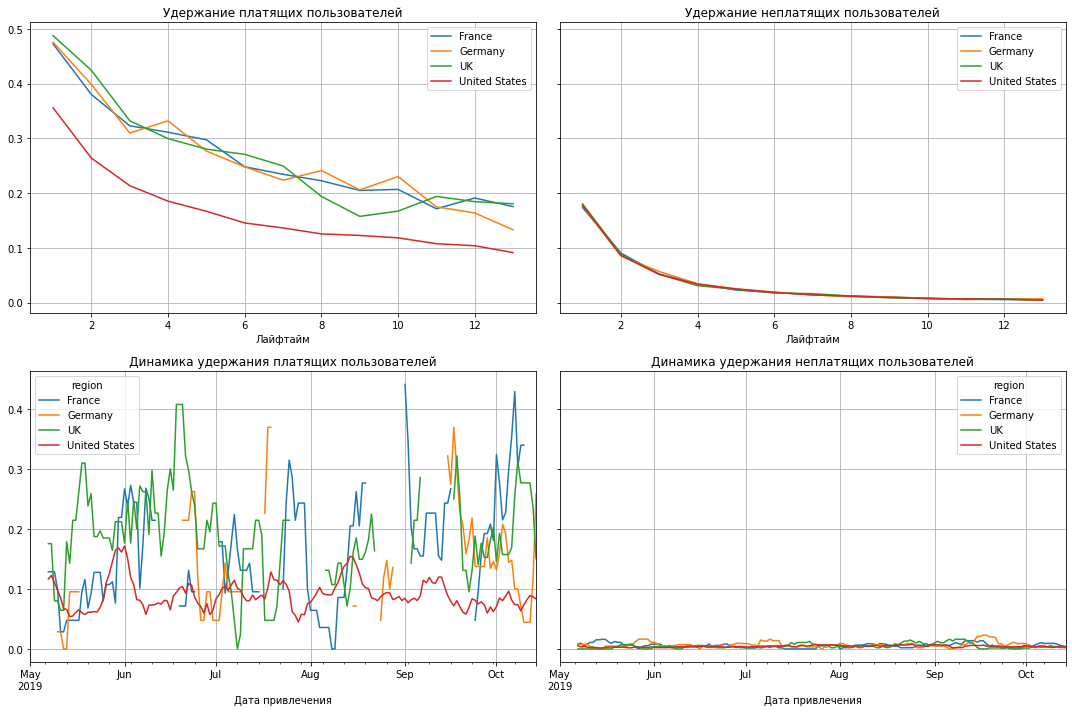

In [62]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Анализ графика удержания с разбивкой по странам:** Удержание платящих пользователей из США самое низкое.

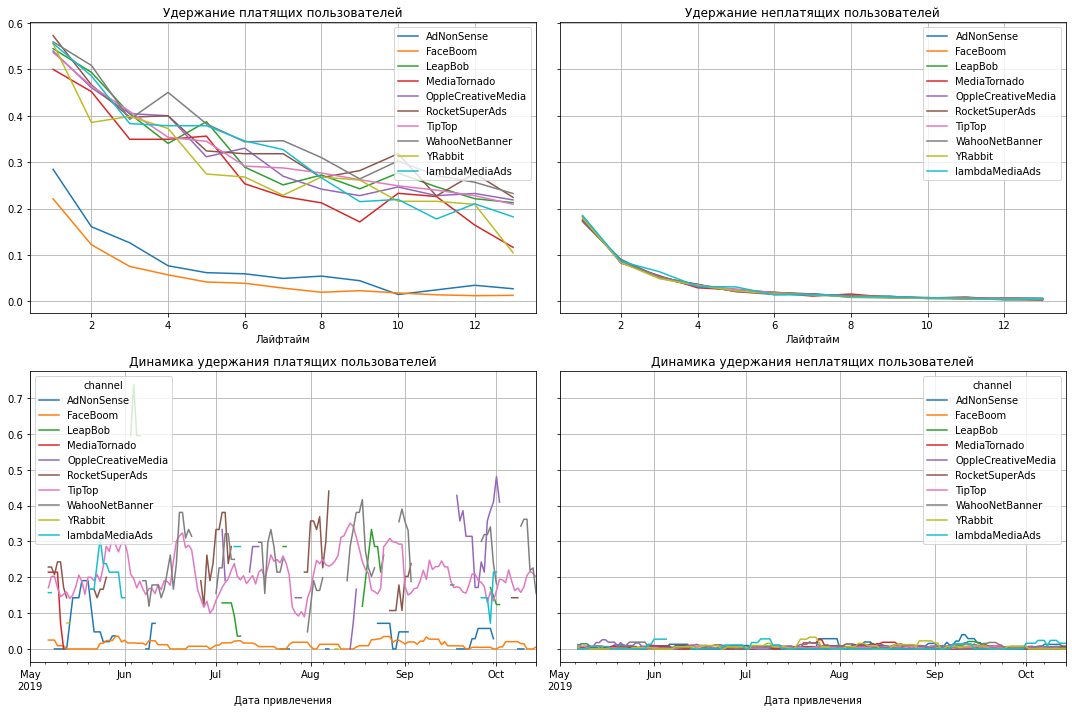

In [63]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Анализ графика удержания с разбивкой по каналам:** Удержание платящих пользователей из каналов `AdNonSense` и `FaceBoom` самое низкое.

**Выводы по разделу:**

Вывод по графикам общей окупаемости рекламы:
1. LTV держится на примерно одном уровне на протяжении всего эксперимента
2. CAC на протяжении всего эксперимента растёт
3. ROI не доходит до уровня окупаемости.
4. Пользователи перестают окупаться уже в июне

**Анализ графика окупаемости рекламы с разбивкой по устройствам:** 
1. LTV пользователей с устройствами PC самый низкий, но затраты на рекламу окупаются раньше чем с другими устройствами.
2. Динамика стоимости привлечения пользователей растёт у всех, но более интенсивно для устройств `Mac` и `iPhone`.
3. Начниная с конца августа пользователи всех устройств перестали окупаются к концу 2 недели, кроме `РС`.  

**Анализ графика окупаемости рекламы с разбивкой по странам:**
LTV пользователей из США самый высокий, но затраты на рекламу не окупаются.

**Анализ графика окупаемости рекламы с разбивкой по каналам:**
- LTV на каналах существенно различается.
- Динамика стоимости привлечения пользователей растёт только у `TipTop`.
- Не окупаются к концу 2 недели пользователи из каналов: `TipTop`, `FaceBoom`, `AdNonSense`.

Конверсия пользоватлей в период лайфтайма растет, динамика не стабильна, но больших просадок нет.
Динамика удержания платящих пользователей не стабильна, в отличии от неплатящих, но выше.

**Анализ графика конверсии с разбивкой по устройствам:** Большие просадки по конверсии у пользователей `PC` и `Android`.

**Анализ графика конверсии с разбивкой по странам:** Конверсия пользователей из США в 2 раза выше чем у пользователей из других стран.

**Анализ графика конверсии с разбивкой по каналам:** В конверсии пользователей из разных каналов наблюдается сезонность.

**Анализ графика удержания с разбивкой по устройствам:** Динамика удержания неплатящих пользователей примерно одинаковая.

**Анализ графика удержания с разбивкой по странам:** Удержание платящих пользователей из США самое низкое.

**Анализ графика удержания с разбивкой по каналам:** Удержание платящих пользователей из каналов `AdNonSense` и `FaceBoom` самое низкое.


**ИТОГО:** 
1. Реклама не окупается к концу второй недели.
2. Из стран USA снижает окупаемость рекламы. Из каналов: `TipTop`, `FaceBoom`, `AdNonSense`. Хуже всего удерживаются платящие пользователи устройств `IPhone` и `MAC`.
3. Проблемы с окупаемостью вызваны неправильным распределением средств на привлечение с каналов.

## 8 Общие выводы.

### 8.1 Причины неэффективности привлечения пользователей:

3 канала инвестиции с которых не окупились: `AdNonSense`, `FaceBoom`, `TipTop`. Основными пользователями с этих каналов являются жители США. Также удержание платящих пользователей из США оказалось хуже всех. ROI по странам в динамике показал, что с каждым месяцем привлеченные платящие пользователи из США всё хуже окупались, но динамика стоимости привлечения этих пользователей только наращивалась.

Возможные причины, связанные с проблемой рекламы в США:
- пользователи `Mac` и `IPhone` оказались самыми неплатящими, возможно есть проблема с оптимизацией приложения **Procrastinate Pro+** для ios устройств
- рекламная система `TipTop` оказалась неэффективной. Не стоило много вкладывать в этот канал. Можно предположить, что в этой соц сети не сидят жители США, а используют жители других стран, которые подключены к VPN.
- Необоснованное увеличение CAC в канале `TipTop`
- Конверсия пользователей `FaceBoom` была самой высокой, но удержание платящих пользователей было самое низкое. Можно ометить, что этот канал для привлечения работал хорошо, но качество платного контента не устраивало пользователей, поэтому не стоит этот канал списывать со счетов.

### 8.2 Рекомендации для отдела маркетинга:
1. Нужно искать новые каналы для привлечения пользователей из стран: UK и Germany
2. Привлекать больше `PC` и `Android` пользователей.
3. Стоит обратить внимание на 3 недооценённых канала с наивысшим ROI: `Yrabbit`, `MediaTornado`, `lambdaMediaAds`
4. Платящие PC пользователи удерживаются очень хорошо, но конверсия самая низкая. Потенциал есть, нужно обратить внимание на саму рекламу
5. Самый высокий LTV у канала `lambdaMediaAds`. Платящим пользователям явно нравится продукт, можно попробовать найти подешевле канал привлечения для этих пользователей, чтобы увеличить ROI
6. `TipTop` самый невыгодный канал для привлечения, с которого большинство пользователей из страны USA.
7. Удержание платящих пользователей из каналов `AdNonSense` и `FaceBoom` самое низкое, нужно изменить маркетинговую стратегию для этих каналов. 